# Differential selection in Vero versus C636 mapped on ZIKV E protein structure

Note: *It may take a minute for the structures to render, please be patient.*

The structure below is PDB [5ire](https://www.rcsb.org/structure/5IRE) of the ZIKV E protein.

In [1]:
# This notebook is designed so that it can be run in appmode
# (https://github.com/oschuett/appmode), and for that reason has
# comments written mostly in code cells rather than Markdown.

In [2]:
# import Python modules

import io
import os

from IPython.display import display, Image

import matplotlib.pyplot as plt

import nglview

import numpy

import pandas as pd

import yaml

from dms_struct.colorschemes import ValueToColorMap
from dms_struct.struct_widget import colored_struct

In [3]:
# Read in the data
data_csv = 'results/host_adaptation/host_adaptation.csv'  # CSV file with tidy data frame to plot

df = (
    pd.read_csv(data_csv)
    .assign(
        diffsel=lambda x: x['diffsel_Vero_vs_C636'],
        abs_diffsel=lambda x: x['diffsel'].map(abs),
        pos_diffsel=lambda x: numpy.clip(x['diffsel'], 0, None),
        neg_diffsel=lambda x: numpy.abs(numpy.clip(x['diffsel'], None, 0)),
        )
    .groupby('site')
    .aggregate(
        tot_abs_diffsel=pd.NamedAgg(column='abs_diffsel', aggfunc='sum'),
        max_abs_diffsel=pd.NamedAgg(column='abs_diffsel', aggfunc='max'),
        tot_diffsel_Vero=pd.NamedAgg(column='pos_diffsel', aggfunc='sum'),
        tot_diffsel_C636=pd.NamedAgg(column='neg_diffsel', aggfunc='sum'),
        max_diffsel_Vero=pd.NamedAgg(column='pos_diffsel', aggfunc='max'),
        max_diffsel_C636=pd.NamedAgg(column='neg_diffsel', aggfunc='max')
       )
    .reset_index()
    )

df = pd.concat([df.assign(chain=chain) for chain in ['A', 'C', 'E']])

In [4]:
# representation for structure, such as `cartoon`, `surface`, `spacefill`
representation = ['surface', 'spacefill']

outdir = './structure_images/'  # output directory for structure images

pdb = './data/5ire.pdb'  # PDB ID
# orientation of structure: https://github.com/arose/nglview/issues/785#issuecomment-487409212
orientation = [-34.228545018840116,
               -58.94588248247589,
               -41.878271743894494,
               0,
               65.17090734761523,
               -45.2207945181419,
               10.38424665715765,
               0,
               -31.323466305342283,
               -29.672591418853816,
               67.36748308425891,
               0,
               87.31300354003906,
               128.35000610351562,
               143.71299743652344,
               1]

Below we represent several kinds of selection on the structure:

  1. The total selection for either cell type at each site.
     This is the sum of the absolute values for all mutations at a site, and indicates if a site is likely to be important for host adaptation.
     
  2. The maximum selection for any mutation in either cell type.
     This is the absolute value of the differential selection for the most selected mutation at each site.
     It indicates if there is a highly important mutation at a site.
     
  3. The total selection for Vero-specific mutations at a site.
     This is the sum of the positive differential selection values, and indicates if a site is important for adaptation for Vero.
     
  4. The total selection for C636-specific mutations at a site.
     This is the absolute value of the sum of the negative differential selection values, and indicates if a site is important for adaptation for C636.
     
  5. The maximum selection for any Vero-specific mutation at a site.
     This is the max differential selection at each site.
     It indicates if there is a highly important Vero-specific mutation at a site.
     
  6. The maximum selection for any C636-specific mutation at a site.
     This is the absolute value of the minimum differential selection at each site.
     It indicates if there is a highly specific C636-specific mutation at a site.



--------------- total selection for either cell type ---------------


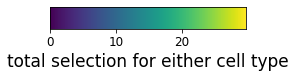

NGLWidget()



--------------- max selection for any mutation and cell type ---------------


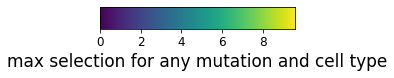

NGLWidget()



--------------- total selection for Vero ---------------


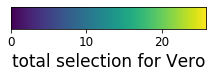

NGLWidget()



--------------- total selection for C636 ---------------


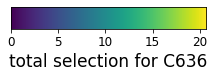

NGLWidget()



--------------- max selection for any mutation for Vero ---------------


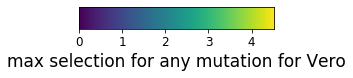

NGLWidget()



--------------- max selection for any mutation for C636 ---------------


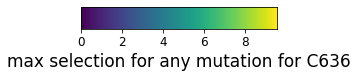

NGLWidget()

In [5]:
for col, description in [
        ('tot_abs_diffsel', 'total selection for either cell type'),
        ('max_abs_diffsel', 'max selection for any mutation and cell type'),
        ('tot_diffsel_Vero', 'total selection for Vero'),
        ('tot_diffsel_C636', 'total selection for C636'),
        ('max_diffsel_Vero', 'max selection for any mutation for Vero'),
        ('max_diffsel_C636', 'max selection for any mutation for C636'),
        ]:
    
    print('\n\n' + '-' * 15 + ' ' + description + ' ' + '-' * 15)
    colormapper = ValueToColorMap(min(0, df[col].min()),
                                  max(0, df[col].max()))

    fig, _ = colormapper.scale_bar(label=description,
                                   orientation='horizontal')
    display(fig)
    plt.close(fig)

    w = colored_struct(
                pdb=pdb,
                prop_df=df.assign(color=lambda x: x[col].map(colormapper.val_to_color)),
                chain_col='chain',
                site_col='site',
                representation='spacefill',
                show_other='protein',
                orientation=orientation,
                )

    display(w)